In [1]:
import csv
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
pwd

'C:\\Users\\Smokey\\Desktop\\2020_gitclass\\NBA data'

In [3]:
season = os.path.join("..","NBA data", "Seasons_Stats_complete.csv")
salary = os.path.join("..","NBA data", "NBA1 (1).csv")
s2018 = os.path.join("..","NBA data", "2018s.csv")

In [4]:
season_df = pd.read_csv(season)
season_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950,Curly Armstrong,G-F,31,FTW,63,0,0.0,0.368,...,0.705,0,0,0,176,0,0,0,217,458
1,1,1950,Cliff Barker,SG,29,INO,49,0,0.0,0.435,...,0.708,0,0,0,109,0,0,0,99,279
2,2,1950,Leo Barnhorst,SF,25,CHS,67,0,0.0,0.394,...,0.698,0,0,0,140,0,0,0,192,438
3,3,1950,Ed Bartels,F,24,TOT,15,0,0.0,0.312,...,0.559,0,0,0,20,0,0,0,29,63
4,4,1950,Ed Bartels,F,24,DNN,13,0,0.0,0.308,...,0.548,0,0,0,20,0,0,0,27,59


In [5]:
pts_per = season_df['PTS']/season_df["G"]
reb_per = season_df['TRB']/season_df["G"]
ast_per = season_df['AST']/season_df["G"]
season_df["Pts Per Game"] = pts_per
season_df["Reb Per Game"] = reb_per
season_df["Ast Per Game"] = ast_per
season_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Pts Per Game,Reb Per Game,Ast Per Game
0,0,1950,Curly Armstrong,G-F,31,FTW,63,0,0.0,0.368,...,0,176,0,0,0,217,458,7.269841,0.000000,2.793651
1,1,1950,Cliff Barker,SG,29,INO,49,0,0.0,0.435,...,0,109,0,0,0,99,279,5.693878,0.000000,2.224490
2,2,1950,Leo Barnhorst,SF,25,CHS,67,0,0.0,0.394,...,0,140,0,0,0,192,438,6.537313,0.000000,2.089552
3,3,1950,Ed Bartels,F,24,TOT,15,0,0.0,0.312,...,0,20,0,0,0,29,63,4.200000,0.000000,1.333333
4,4,1950,Ed Bartels,F,24,DNN,13,0,0.0,0.308,...,0,20,0,0,0,27,59,4.538462,0.000000,1.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,703,2019,Tyler Zeller,C,29,MEM,4,82,19.4,0.640,...,18,3,1,3,4,16,46,11.500000,4.500000,0.750000
26059,704,2019,Ante Žižić,C,22,CLE,59,1082,16.2,0.590,...,320,53,13,22,61,113,459,7.779661,5.423729,0.898305
26060,705,2019,Ivica Zubac,C,21,TOT,59,1040,18.9,0.604,...,362,63,14,51,70,137,525,8.898305,6.135593,1.067797
26061,706,2019,Ivica Zubac,C,21,LAL,33,516,19.5,0.633,...,162,25,4,27,33,73,281,8.515152,4.909091,0.757576


In [6]:
season_filt = season_df[["Year", "Player", "Pts Per Game","Reb Per Game", "Ast Per Game"]]
season_filt.head(10)

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game
0,1950,Curly Armstrong,7.269841,0.0,2.793651
1,1950,Cliff Barker,5.693878,0.0,2.224490
2,1950,Leo Barnhorst,6.537313,0.0,2.089552
3,1950,Ed Bartels,4.200000,0.0,1.333333
4,1950,Ed Bartels,4.538462,0.0,1.538462
5,1950,Ed Bartels,2.000000,0.0,0.000000
6,1950,Ralph Beard,14.916667,0.0,3.883333
7,1950,Gene Berce,3.333333,0.0,0.666667
8,1950,Charlie Black,10.169231,0.0,2.507692
9,1950,Charlie Black,10.611111,0.0,2.083333


In [38]:
salary_df = pd.read_csv(salary)
salary_df.count()

Player           50
Contract year    50
Avg Annual       50
Prior  Pts       49
Prior Reb        49
Prior Ast        49
After Pts        49
After Reb        49
After Ast        49
dtype: int64

In [8]:
merge_df = pd.merge(season_filt, salary_df, on="Player")
merge_df.head()

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,Contract year,Avg Annual,Prior Pts,Prior Reb,Prior Ast,After Pts,After Reb,After Ast
0,2004,Carmelo Anthony,21.036585,6.073171,2.768293,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
1,2005,Carmelo Anthony,20.773333,5.680000,2.586667,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
2,2006,Carmelo Anthony,26.525000,4.925000,2.700000,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
3,2007,Carmelo Anthony,28.938462,6.015385,3.830769,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
4,2008,Carmelo Anthony,25.688312,7.415584,3.363636,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3


In [9]:
filt_merge = merge_df[["Year", "Player", "Pts Per Game", "Reb Per Game", "Ast Per Game", "Contract year", "Avg Annual"]]
filt_merge.head()

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,Contract year,Avg Annual
0,2004,Carmelo Anthony,21.036585,6.073171,2.768293,2017,"26,243,760"
1,2005,Carmelo Anthony,20.773333,5.680000,2.586667,2017,"26,243,760"
2,2006,Carmelo Anthony,26.525000,4.925000,2.700000,2017,"26,243,760"
3,2007,Carmelo Anthony,28.938462,6.015385,3.830769,2017,"26,243,760"
4,2008,Carmelo Anthony,25.688312,7.415584,3.363636,2017,"26,243,760"


In [10]:
reduced_df = filt_merge.loc[filt_merge["Year"] > 2014.0]
reduced_df.head()                           

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,Contract year,Avg Annual
13,2015,Carmelo Anthony,24.150000,6.600000,3.050000,2017,"26,243,760"
14,2016,Carmelo Anthony,21.847222,7.722222,4.152778,2017,"26,243,760"
15,2017,Carmelo Anthony,22.418919,5.891892,2.878378,2017,"26,243,760"
16,2018,Carmelo Anthony,16.166667,5.807692,1.320513,2017,"26,243,760"
17,2019,Carmelo Anthony,13.400000,5.400000,0.500000,2017,"26,243,760"


In [20]:
pd.options.display.float_format = "{:,.1f}".format
reduced_df.head(20)

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,Contract year,Avg Annual
13,2015,Carmelo Anthony,24.1,6.6,3.0,2017,"26,243,760"
14,2016,Carmelo Anthony,21.8,7.7,4.2,2017,"26,243,760"
15,2017,Carmelo Anthony,22.4,5.9,2.9,2017,"26,243,760"
16,2018,Carmelo Anthony,16.2,5.8,1.3,2017,"26,243,760"
17,2019,Carmelo Anthony,13.4,5.4,0.5,2017,"26,243,760"
29,2015,Chris Bosh,21.1,7.0,2.2,2017,"25,289,390"
30,2016,Chris Bosh,19.1,7.4,2.4,2017,"25,289,390"
42,2015,LeBron James,25.3,6.0,7.4,2017,"33,285,709"
43,2016,LeBron James,25.3,7.4,6.8,2017,"33,285,709"
44,2017,LeBron James,26.4,8.6,8.7,2017,"33,285,709"


In [40]:
reduced_df['Player'].unique()

array(['Carmelo Anthony', 'Chris Bosh', 'LeBron James', 'Dwight Howard',
       'Chris Paul', 'LaMarcus Aldridge', 'Paul Millsap', 'Mike Conley',
       'Kevin Durant', 'Al Horford', 'Ryan Anderson', 'Danilo Gallinari',
       'Marc Gasol', 'George Hill', 'DeAndre Jordan', 'Brook Lopez',
       'Kevin Love', 'Russell Westbrook', 'Stephen Curry',
       'DeMar DeRozan', 'James Harden', 'Serge Ibaka', 'Jeff Teague',
       'DeMarcus Cousins', 'Paul George', 'Blake Griffin',
       'Gordon Hayward', 'John Wall', 'Hassan Whiteside', 'Jimmy Butler',
       'Kyrie Irving', 'Enes Kanter', 'Kawhi Leonard', 'Harrison Barnes',
       'Bradley Beal', 'Anthony Davis', 'Damian Lillard', 'Steven Adams',
       'Allen Crabbe', 'Rudy Gobert', 'Victor Oladipo', 'Otto Porter',
       'CJ McCollum'], dtype=object)

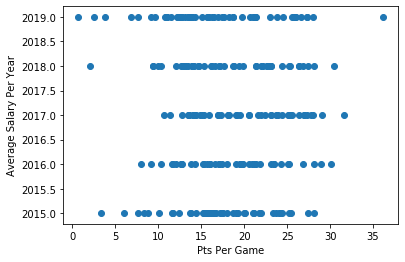

In [13]:
x_values = reduced_df['Pts Per Game']
y_values = reduced_df['Year']
plt.scatter(x_values,y_values)
plt.xlabel('Pts Per Game')
plt.ylabel('Average Salary Per Year')
plt.show()

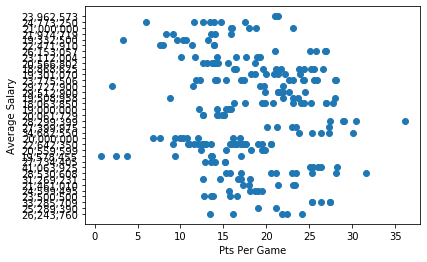

In [14]:
plt.scatter(reduced_df.iloc[:,2],reduced_df.iloc[:,6])
plt.xlabel('Pts Per Game')
plt.ylabel('Average Salary')
plt.show()

In [31]:
nba2k17 = reduced_df.loc[reduced_df["Year"] == 2017, :]
nba2k15 = reduced_df.loc[reduced_df["Year"] == 2015, :]
nba2k16 = reduced_df.loc[reduced_df["Year"] == 2016, :]
nba2k18 = reduced_df.loc[reduced_df["Year"] == 2018, :]
nba2k19 = reduced_df.loc[reduced_df["Year"] == 2019, :]
nba2k18

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,Contract year,Avg Annual
16,2018,Carmelo Anthony,16.2,5.8,1.3,2017,"26,243,760"
45,2018,LeBron James,27.5,8.6,9.1,2017,"33,285,709"
60,2018,Dwight Howard,16.6,12.5,1.3,2017,"23,500,500"
74,2018,Chris Paul,18.6,5.4,7.9,2017,"24,599,495"
87,2018,LaMarcus Aldridge,23.1,8.5,2.0,2017,"21,461,010"
100,2018,Paul Millsap,14.6,6.4,2.8,2017,"31,269,231"
112,2018,Mike Conley,17.1,2.2,4.1,2016,"28,530,608"
124,2018,Kevin Durant,26.4,6.8,5.4,2016,"41,063,925"
136,2018,Al Horford,12.9,7.4,4.7,2016,"27,734,405"
147,2018,Ryan Anderson,9.3,5.0,0.9,2016,"19,578,455"


In [34]:
nba2k18.drop_duplicates(subset="Player", keep="first", inplace=True)
nba2k18

C:\Users\Smokey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,Contract year,Avg Annual
16,2018,Carmelo Anthony,16.2,5.8,1.3,2017,"26,243,760"
45,2018,LeBron James,27.5,8.6,9.1,2017,"33,285,709"
60,2018,Dwight Howard,16.6,12.5,1.3,2017,"23,500,500"
74,2018,Chris Paul,18.6,5.4,7.9,2017,"24,599,495"
87,2018,LaMarcus Aldridge,23.1,8.5,2.0,2017,"21,461,010"
100,2018,Paul Millsap,14.6,6.4,2.8,2017,"31,269,231"
112,2018,Mike Conley,17.1,2.2,4.1,2016,"28,530,608"
124,2018,Kevin Durant,26.4,6.8,5.4,2016,"41,063,925"
136,2018,Al Horford,12.9,7.4,4.7,2016,"27,734,405"
147,2018,Ryan Anderson,9.3,5.0,0.9,2016,"19,578,455"


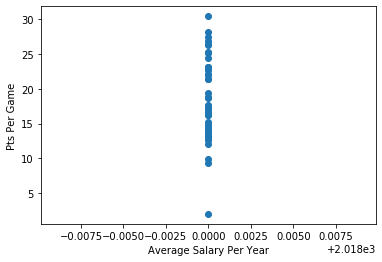

In [43]:
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()